# Hierarchical clustering for matching test survey

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering

#### Read data removing meaningless variables

In [13]:
df = pd.read_excel("Matching test.xlsx", skiprows=1)
pd.set_option('display.max_columns', None)
df.head()

C:\Users\SLO\AppData\Roaming\Python\Python38\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Name,Gender,Age,Windows vs. Mac,Hamburguer vs. Pizza,Spring vs. Summer,Play in the sand vs. Snow,Nutella vs. Nachos,Wine vs. Beer,Relax in the Caribbean vs. Sightseeing Europe,Letters vs. Numbers,Love Starbucks vs. Hate it,Travel to the future vs. the past,10 million $ Cash vs. True love,Tea vs. Coffee,Read other's minds vs. To fly,Be a bit hotter vs. smarter,Music vs. Literature,Theatre vs. Cinema,Teletransportation vs. Invisibility,Hate unpunctuality vs. Don´t care,Fish vs. Meat,Feeling vs. Thinking,Eat in front of TV vs. on Table,I will sure have children vs. Not sure,Science vs. Religion,Sea vs. Mountain,Day vs. Night,Star wars vs. Godfather,Classic music vs. Jazz,Pop vs. Rock,Will never spend 200$ in a good bottle of wine vs. Perhaps,Look in partner: Appearence vs. Personality
0,2025-01-15 10:46:26,2025-01-15 10:48:16,0,165.85.220.33,100,110,1,2025-01-15 10:48:18.562,R_8TBPFHLEi8IKd9a,NaN,NaN,NaN,NaN,40.4163,-3.6934,qr,EN,Emin,1,23,2.0,1.0,2,2,2.0,2.0,2.0,2,2.0,1.0,1.0,1,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,2.0,2.0
1,2025-01-15 10:46:36,2025-01-15 10:48:24,0,176.83.49.119,100,107,1,2025-01-15 10:48:25.455,R_2Ff72unn5uyGPZQ,NaN,NaN,NaN,NaN,40.3689,-3.7264,qr,EN,Sergio Lebed,1,24,2.0,2.0,1,1,2.0,2.0,1.0,2,1.0,1.0,1.0,2,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1,1.0,1.0,1.0,1,2.0,2.0,2.0,1.0,2.0
2,2025-01-15 10:46:43,2025-01-15 10:48:48,0,165.85.220.33,100,124,1,2025-01-15 10:48:48.563,R_8khmO7QXUNIwmIb,NaN,NaN,NaN,NaN,40.4163,-3.6934,qr,EN,Lucas Brunner,1,29,2.0,1.0,1,2,2.0,2.0,2.0,2,2.0,2.0,1.0,2,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2,2.0,1.0,2.0,1,2.0,2.0,2.0,2.0,2.0
3,2025-01-15 10:46:33,2025-01-15 10:48:48,0,90.167.218.164,100,135,1,2025-01-15 10:48:49.540,R_2g0hUSmhUHbnIDz,NaN,NaN,NaN,NaN,40.3940,-3.7188,qr,EN,Silvana,2,22,2.0,2.0,2,1,1.0,1.0,1.0,2,1.0,1.0,NaN,2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,1.0,1,NaN,NaN,1.0,NaN,NaN
4,2025-01-15 10:46:23,2025-01-15 10:48:56,0,31.4.181.156,100,153,1,2025-01-15 10:48:57.087,R_24usLxcV9Bp1ubM,NaN,NaN,NaN,NaN,40.3780,-3.7242,qr,EN,Yousef j,1,22,2.0,1.0,2,1,2.0,NaN,1.0,1,2.0,2.0,1.0,2,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2,1.0,2.0,1.0,1,2.0,2.0,1.0,1.0,1.0


In [20]:
new_df = df.drop(['Start Date',	'End Date', 'Response Type', 'Progress', 'Recorded Date', 'Response ID', 'Duration (in seconds)', 'Finished',	'Recipient Last Name',	'Recipient First Name',	'Recipient Email',	'External Data Reference',	'Location Latitude',	'Location Longitude'], axis = 1)
new_df.head()

,IP Address,Distribution Channel,User Language,Name,Gender,Age,Windows vs. Mac,Hamburguer vs. Pizza,Spring vs. Summer,Play in the sand vs. Snow,Nutella vs. Nachos,Wine vs. Beer,Relax in the Caribbean vs. Sightseeing Europe,Letters vs. Numbers,Love Starbucks vs. Hate it,Travel to the future vs. the past,10 million $ Cash vs. True love,Tea vs. Coffee,Read other's minds vs. To fly,Be a bit hotter vs. smarter,Music vs. Literature,Theatre vs. Cinema,Teletransportation vs. Invisibility,Hate unpunctuality vs. Don´t care,Fish vs. Meat,Feeling vs. Thinking,Eat in front of TV vs. on Table,I will sure have children vs. Not sure,Science vs. Religion,Sea vs. Mountain,Day vs. Night,Star wars vs. Godfather,Classic music vs. Jazz,Pop vs. Rock,Will never spend 200$ in a good bottle of wine vs. Perhaps,Look in partner: Appearence vs. Personality
0,165.85.220.33,qr,EN,Emin,1,23,2.0,1.0,2,2,2.0,2.0,2.0,2,2.0,1.0,1.0,1,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,2.0,2.0
1,176.83.49.119,qr,EN,Sergio Lebed,1,24,2.0,2.0,1,1,2.0,2.0,1.0,2,1.0,1.0,1.0,2,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1,1.0,1.0,1.0,1,2.0,2.0,2.0,1.0,2.0
2,165.85.220.33,qr,EN,Lucas Brunner,1,29,2.0,1.0,1,2,2.0,2.0,2.0,2,2.0,2.0,1.0,2,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2,2.0,1.0,2.0,1,2.0,2.0,2.0,2.0,2.0
3,90.167.218.164,qr,EN,Silvana,2,22,2.0,2.0,2,1,1.0,1.0,1.0,2,1.0,1.0,NaN,2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,1.0,1,NaN,NaN,1.0,NaN,NaN
4,31.4.181.156,qr,EN,Yousef j,1,22,2.0,1.0,2,1,2.0,NaN,1.0,1,2.0,2.0,1.0,2,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2,1.0,2.0,1.0,1,2.0,2.0,1.0,1.0,1.0


In [23]:
new_df[new_df['Name'] == 'Spencer']

,IP Address,Distribution Channel,User Language,Name,Gender,Age,Windows vs. Mac,Hamburguer vs. Pizza,Spring vs. Summer,Play in the sand vs. Snow,Nutella vs. Nachos,Wine vs. Beer,Relax in the Caribbean vs. Sightseeing Europe,Letters vs. Numbers,Love Starbucks vs. Hate it,Travel to the future vs. the past,10 million $ Cash vs. True love,Tea vs. Coffee,Read other's minds vs. To fly,Be a bit hotter vs. smarter,Music vs. Literature,Theatre vs. Cinema,Teletransportation vs. Invisibility,Hate unpunctuality vs. Don´t care,Fish vs. Meat,Feeling vs. Thinking,Eat in front of TV vs. on Table,I will sure have children vs. Not sure,Science vs. Religion,Sea vs. Mountain,Day vs. Night,Star wars vs. Godfather,Classic music vs. Jazz,Pop vs. Rock,Will never spend 200$ in a good bottle of wine vs. Perhaps,Look in partner: Appearence vs. Personality
47,165.85.220.36,qr,EN,Spencer,1,23,1.0,1.0,2,2,2.0,2.0,1.0,2,2.0,2.0,2.0,2,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1,1.0,1.0,1.0,2,2.0,1.0,2.0,2.0,2.0


In [24]:
df = df.drop(df.columns[:5], axis=1)
df = df.drop(df.columns[1:12], axis=1)
df.head()

,Duration (in seconds),Name,Gender,Age,Windows vs. Mac,Hamburguer vs. Pizza,Spring vs. Summer,Play in the sand vs. Snow,Nutella vs. Nachos,Wine vs. Beer,Relax in the Caribbean vs. Sightseeing Europe,Letters vs. Numbers,Love Starbucks vs. Hate it,Travel to the future vs. the past,10 million $ Cash vs. True love,Tea vs. Coffee,Read other's minds vs. To fly,Be a bit hotter vs. smarter,Music vs. Literature,Theatre vs. Cinema,Teletransportation vs. Invisibility,Hate unpunctuality vs. Don´t care,Fish vs. Meat,Feeling vs. Thinking,Eat in front of TV vs. on Table,I will sure have children vs. Not sure,Science vs. Religion,Sea vs. Mountain,Day vs. Night,Star wars vs. Godfather,Classic music vs. Jazz,Pop vs. Rock,Will never spend 200$ in a good bottle of wine vs. Perhaps,Look in partner: Appearence vs. Personality
0,110,Emin,1,23,2.0,1.0,2,2,2.0,2.0,2.0,2,2.0,1.0,1.0,1,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,2.0,2.0
1,107,Sergio Lebed,1,24,2.0,2.0,1,1,2.0,2.0,1.0,2,1.0,1.0,1.0,2,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1,1.0,1.0,1.0,1,2.0,2.0,2.0,1.0,2.0
2,124,Lucas Brunner,1,29,2.0,1.0,1,2,2.0,2.0,2.0,2,2.0,2.0,1.0,2,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2,2.0,1.0,2.0,1,2.0,2.0,2.0,2.0,2.0
3,135,Silvana,2,22,2.0,2.0,2,1,1.0,1.0,1.0,2,1.0,1.0,NaN,2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,1.0,1,NaN,NaN,1.0,NaN,NaN
4,153,Yousef j,1,22,2.0,1.0,2,1,2.0,NaN,1.0,1,2.0,2.0,1.0,2,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2,1.0,2.0,1.0,1,2.0,2.0,1.0,1.0,1.0


#### Show empty values and then replace them for a fixed value .. which one?

In [25]:
df.isnull().sum()

Duration (in seconds)                                         0
Name                                                          1
Gender                                                        0
Age                                                           0
Windows vs. Mac                                               1
Hamburguer vs. Pizza                                          3
Spring vs. Summer                                             0
Play in the sand vs. Snow                                     0
Nutella vs. Nachos                                            1
Wine vs. Beer                                                 4
Relax in the Caribbean vs. Sightseeing Europe                 2
Letters vs. Numbers                                           0
Love Starbucks vs. Hate it                                    5
Travel to the future vs. the past                             2
10 million $ Cash vs. True love                               2
Tea vs. Coffee                          

In [26]:
df.iloc[:, 4:] = df.iloc[:, 4:].fillna(1.5)
df.isnull().sum()

Duration (in seconds)                                         0
Name                                                          1
Gender                                                        0
Age                                                           0
Windows vs. Mac                                               0
Hamburguer vs. Pizza                                          0
Spring vs. Summer                                             0
Play in the sand vs. Snow                                     0
Nutella vs. Nachos                                            0
Wine vs. Beer                                                 0
Relax in the Caribbean vs. Sightseeing Europe                 0
Letters vs. Numbers                                           0
Love Starbucks vs. Hate it                                    0
Travel to the future vs. the past                             0
10 million $ Cash vs. True love                               0
Tea vs. Coffee                          

#### Separate labels and take only explanatory variables starting from "Windows vs. Mac"

In [27]:
labels = df.iloc[:, 1].to_list()
X = df.iloc[:, 4:]
X.head()

,Windows vs. Mac,Hamburguer vs. Pizza,Spring vs. Summer,Play in the sand vs. Snow,Nutella vs. Nachos,Wine vs. Beer,Relax in the Caribbean vs. Sightseeing Europe,Letters vs. Numbers,Love Starbucks vs. Hate it,Travel to the future vs. the past,10 million $ Cash vs. True love,Tea vs. Coffee,Read other's minds vs. To fly,Be a bit hotter vs. smarter,Music vs. Literature,Theatre vs. Cinema,Teletransportation vs. Invisibility,Hate unpunctuality vs. Don´t care,Fish vs. Meat,Feeling vs. Thinking,Eat in front of TV vs. on Table,I will sure have children vs. Not sure,Science vs. Religion,Sea vs. Mountain,Day vs. Night,Star wars vs. Godfather,Classic music vs. Jazz,Pop vs. Rock,Will never spend 200$ in a good bottle of wine vs. Perhaps,Look in partner: Appearence vs. Personality
0,2.0,1.0,2,2,2.0,2.0,2.0,2,2.0,1.0,1.0,1,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,2.0,2.0
1,2.0,2.0,1,1,2.0,2.0,1.0,2,1.0,1.0,1.0,2,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1,1.0,1.0,1.0,1,2.0,2.0,2.0,1.0,2.0
2,2.0,1.0,1,2,2.0,2.0,2.0,2,2.0,2.0,1.0,2,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2,2.0,1.0,2.0,1,2.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2,1,1.0,1.0,1.0,2,1.0,1.0,1.5,2,1.5,1.5,1.0,1.5,1.5,1.5,1.5,1.5,2,1.5,2.0,1.0,1,1.5,1.5,1.0,1.5,1.5
4,2.0,1.0,2,1,2.0,1.5,1.0,1,2.0,2.0,1.0,2,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2,1.0,2.0,1.0,1,2.0,2.0,1.0,1.0,1.0


#### Heatmap to show correlation between explanatory variables

Do we need to get rid of any variable?

<Axes: >

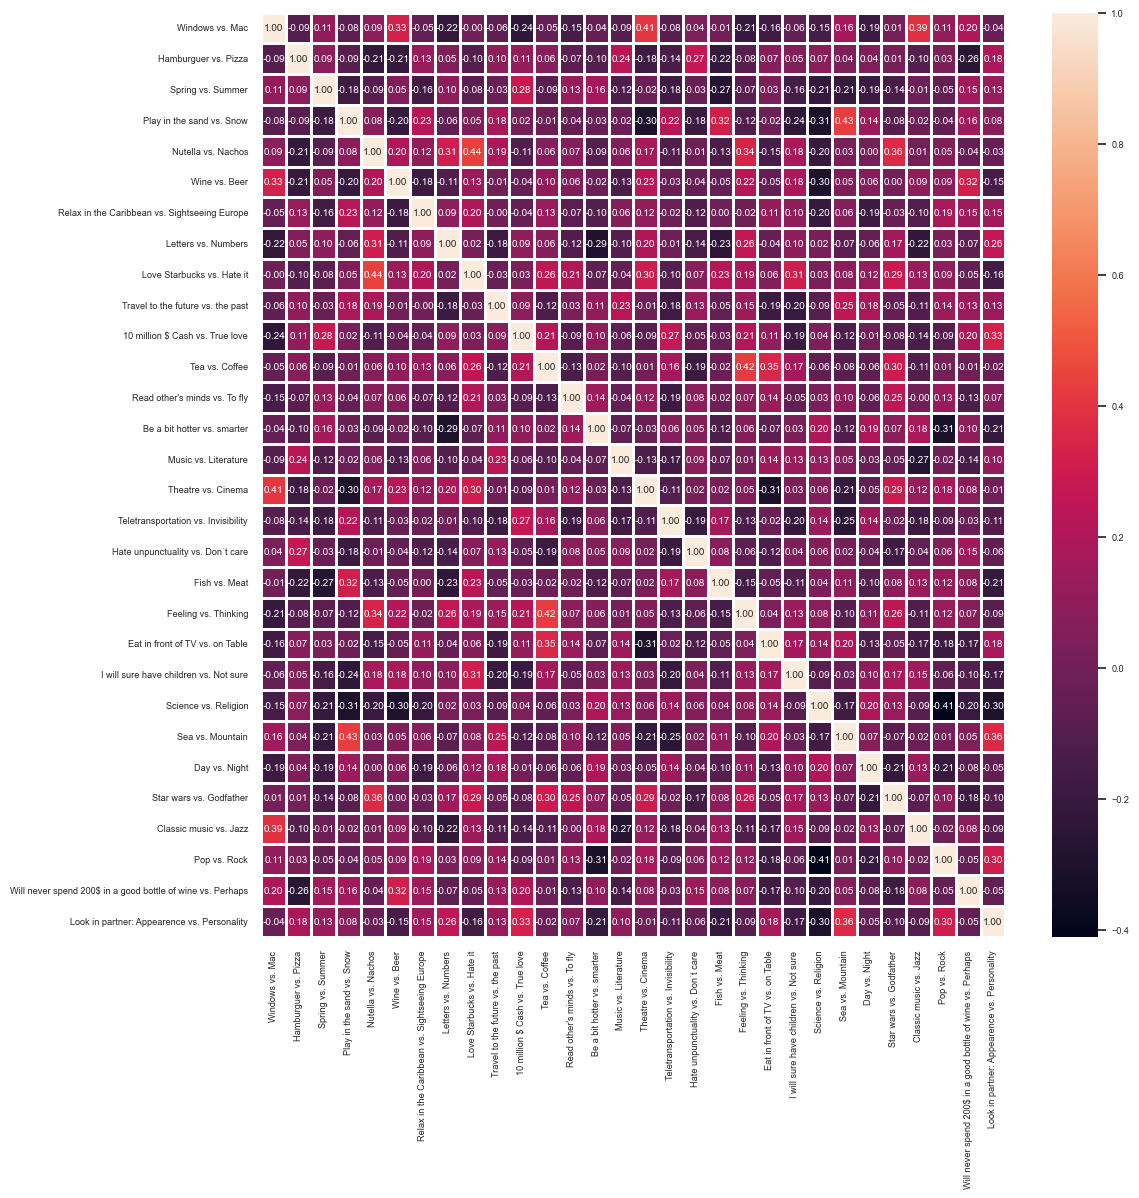

In [28]:
import seaborn as sns

corr_matrix = X.corr()
sns.set(font_scale=0.6)
fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=1, ax=ax)

<Axes: >

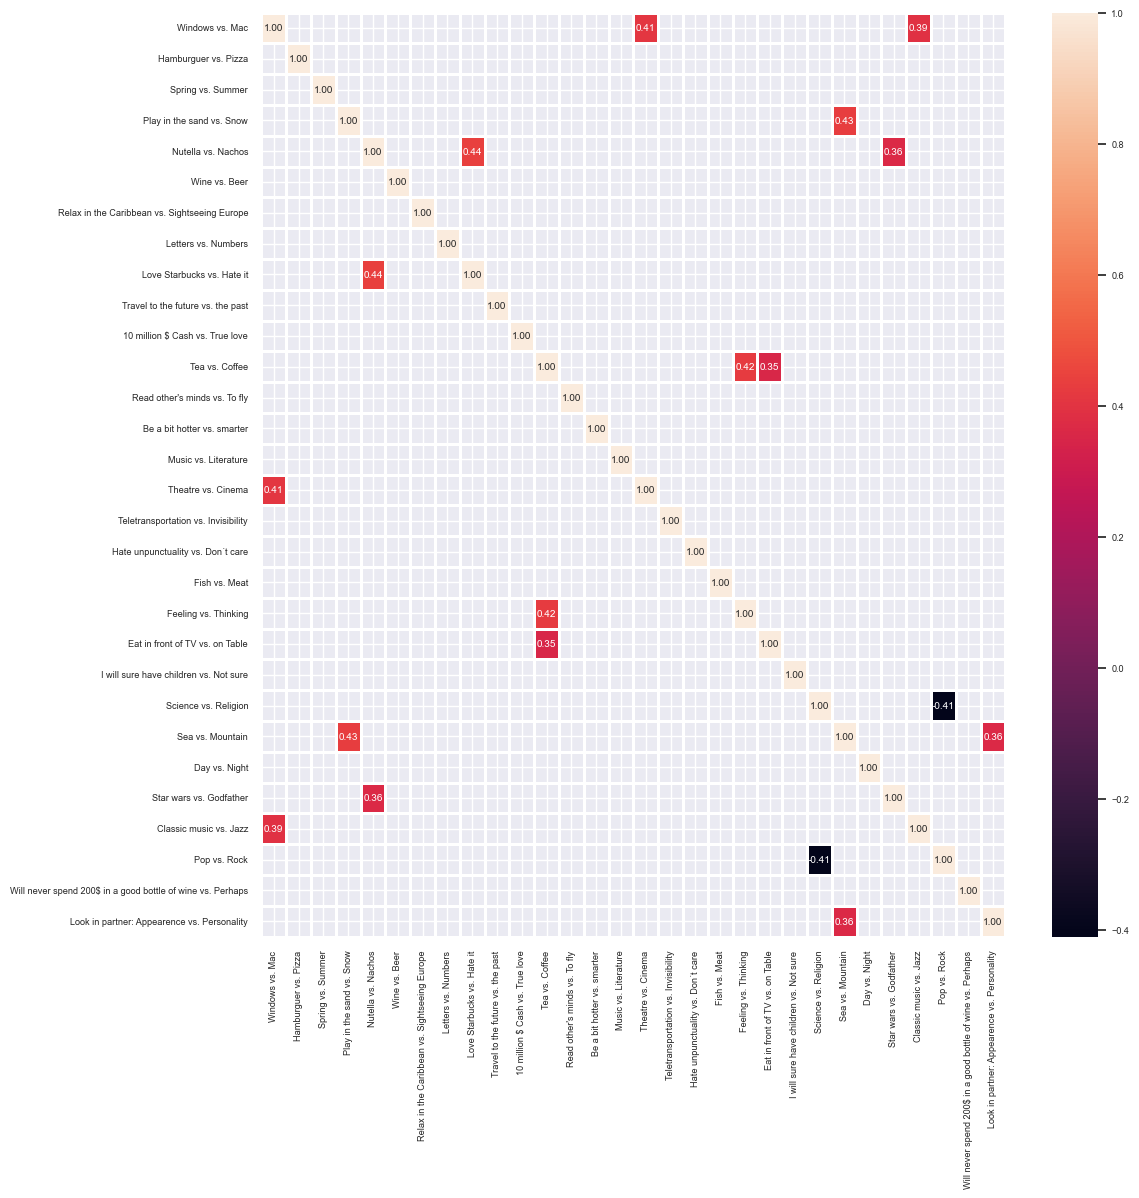

In [29]:
# Show now only pairs with an absolute correlation value above 0.35
high_corr = corr_matrix[abs(corr_matrix) > 0.35]

fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(high_corr, annot=True, fmt=".2f", linewidths=1, ax=ax)

#### Compute distances between each row

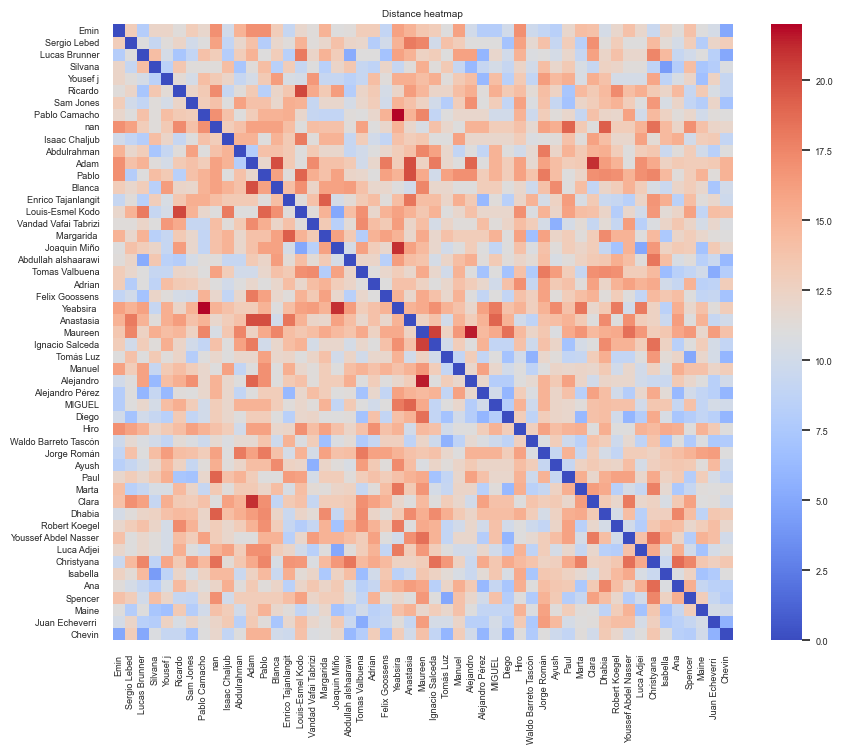

In [30]:
from sklearn.metrics import pairwise_distances

distance_matrix_squared = pairwise_distances(X, metric='euclidean', squared=True) #squared euclidean distances
distance_df = pd.DataFrame(distance_matrix_squared, index=labels, columns=labels)

plt.figure(figsize=(10, 8))  
sns.heatmap(distance_df, cmap="coolwarm", annot=False, cbar=True)
plt.title("Distance heatmap")

distance_df.to_excel("Distances.xlsx")

#### Define the function that creates the dendrogram

In [31]:
def plot_dendrogram(model, **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

#### Show the dendrogram

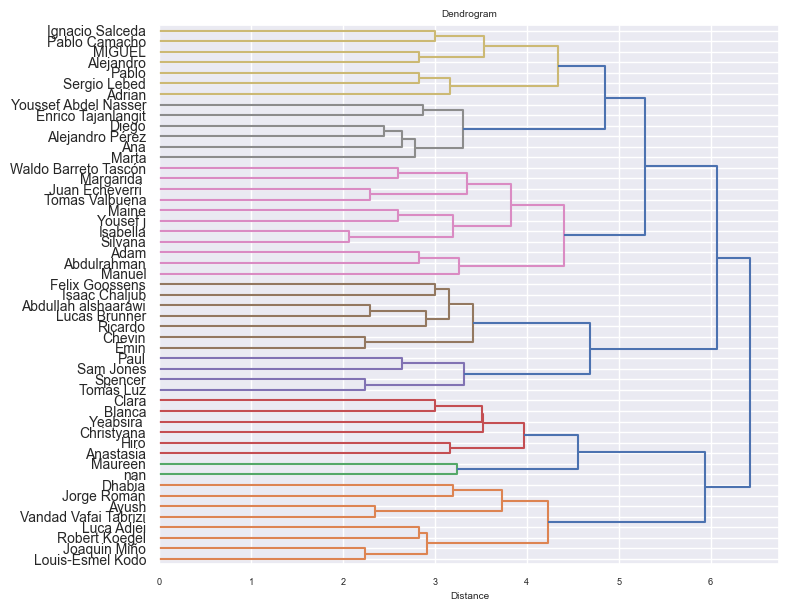

In [32]:
linkage_matrix = linkage(X, method='ward') # other linkage methods: complete, average, single
plt.figure(figsize=(8, 7))
dendrogram(linkage_matrix, labels=labels, leaf_rotation=0, leaf_font_size=10, orientation='right') 
plt.title("Dendrogram")
plt.xlabel("Distance")
plt.show()

#### We run now the model and create the groups, showing the cluster membership of each row

In [33]:
n_clusters = 6  #This number might change with different data

clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', compute_distances=True) 
clustering.fit(X)

# Cluster labels
df['Cluster'] = clustering.labels_+1

df.to_excel("Matching_clustered.xlsx")

df[["Name", "Cluster"]].sort_values("Cluster")

,Name,Cluster
0,Emin,1
47,Spencer,1
37,Paul,1
27,Tomás Luz,1
22,Felix Goossens,1
19,Abdullah alshaarawi,1
9,Isaac Chaljub,1
50,Chevin,1
6,Sam Jones,1
2,Lucas Brunner,1


#### And always a good practice to show cluster sizes

In [34]:
clustersizes = df.groupby('Cluster')['Name'].count().reset_index()
clustersizes

,Cluster,Name
0,1,11
1,2,7
2,3,7
3,4,8
4,5,11
5,6,6


#### And what are Silhouette and Inertia values? 

In [35]:
from sklearn.metrics import silhouette_score

group_column = df["Cluster"]

silhouette_avg = silhouette_score(X, group_column)

# Inertia does not exist in scikit, so that we need to calculate it

centroids = np.array([X[group_column == i].mean(axis=0) for i in range(n_clusters)])
inertia = sum(
    np.sum(np.linalg.norm(X[group_column == i] - centroids[i], axis=1)**2)
    for i in range(n_clusters)
)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Inertia: {inertia:.3f}")

Silhouette Score: 0.056
Inertia: 208.776


#### We run an ANOVA analysis on each variable and sort them by importance (statistical significance)

Is there any variable that might be removed from the analysis?

In [36]:
from scipy.stats import f_oneway

numeric_columns = df.iloc[:, 4:-1] #From "Windows vs. Mac" to last one but "Cluster"

results = []
for column in numeric_columns.columns:
    groups = [group[column].values for name, group in df.groupby(group_column)]
    f_stat, p_value = f_oneway(*groups)
    avg = df[column].mean()
    
    results.append({
        'Column': column,
        'F-statistic': f_stat,
        'p-value': p_value, 
        'Column mean': avg
    })

anova_results_df = pd.DataFrame(results)
anova_results_df.sort_values("p-value")

,Column,F-statistic,p-value,Column mean
3,Play in the sand vs. Snow,13.233739,6.069898e-08,1.490196
15,Theatre vs. Cinema,10.936407,6.304259e-07,1.892157
13,Be a bit hotter vs. smarter,6.658597,1.018892e-04,1.735294
20,Eat in front of TV vs. on Table,6.573582,1.140170e-04,1.568627
11,Tea vs. Coffee,5.742305,3.515204e-04,1.647059
27,Pop vs. Rock,5.489796,4.996332e-04,1.421569
12,Read other's minds vs. To fly,5.447367,5.302758e-04,1.578431
0,Windows vs. Mac,4.811186,1.314568e-03,1.637255
4,Nutella vs. Nachos,4.790877,1.353865e-03,1.598039
23,Sea vs. Mountain,4.711011,1.520561e-03,1.284314


We can see that there are variables that are important for specific groups but not for the whole solution (can you give any example?)

#### We also calculate the profiles for each cluster so that we can describe them and show a heatmap

In [37]:
import pandas as pd

# df_prof will store cluster averages to calculate profile and global metrics
df_prof = df.drop(columns="Name", axis=1) 
df_prof = df_prof.groupby("Cluster").mean().transpose()
df_prof["Average"] = df_prof.mean(axis=1)
df_prof["Std.dev"] = df_prof.std(axis=1)
df_prof

Cluster,1,2,3,4,5,6,Average,Std.dev
Duration (in seconds),191.909091,203.8750,178.000000,217.1250,211.272727,228.000000,205.030303,16.416429
Gender,1.000000,1.7500,1.000000,1.1250,1.363636,1.333333,1.261995,0.261285
Age,26.000000,27.0000,26.142857,25.1250,24.636364,25.166667,25.678481,0.787373
Windows vs. Mac,1.636364,1.2500,1.785714,2.0000,1.363636,2.000000,1.672619,0.289407
Hamburguer vs. Pizza,1.181818,1.7500,1.571429,1.3750,1.409091,1.166667,1.409001,0.205814
Spring vs. Summer,1.545455,1.5000,1.571429,1.6250,1.727273,1.666667,1.605970,0.076207
Play in the sand vs. Snow,1.909091,1.8750,1.000000,1.6250,1.000000,1.500000,1.484848,0.370186
Nutella vs. Nachos,1.909091,1.2500,1.714286,1.2500,1.500000,2.000000,1.603896,0.295383
Wine vs. Beer,1.727273,1.4375,2.000000,1.8125,1.545455,2.000000,1.753788,0.211673
Relax in the Caribbean vs. Sightseeing Europe,1.545455,1.3750,1.357143,1.2500,1.136364,1.333333,1.332882,0.124525


<Axes: xlabel='Cluster'>

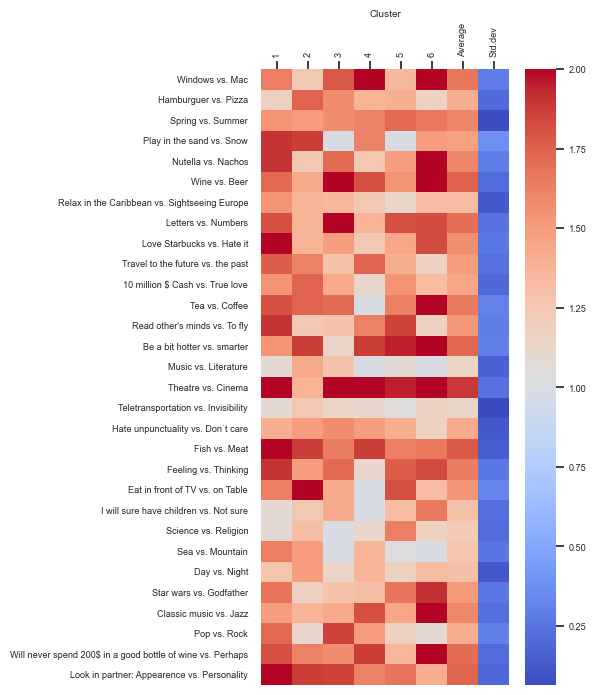

In [38]:
plt.figure(figsize=(4, 8))  
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
sns.heatmap(df_prof[3:], cmap="coolwarm", annot=False, cbar=True)

#### With the heatmap we would be able to assign labels to groups (final stage and our goal)

In [39]:
label1="label1"
label2="label2"
label3="label3"
# ....
# and all other groups

for i in range(1,n_clusters+1):
    text="label" + str(i)
    df["Cluster"] = df["Cluster"].replace(i, text)

df2=df[["Name", "Cluster"]]
df2

,Name,Cluster
0,Emin,label1
1,Sergio Lebed,label3
2,Lucas Brunner,label1
3,Silvana,label5
4,Yousef j,label5
5,Ricardo,label1
6,Sam Jones,label1
7,Pablo Camacho,label3
8,NaN,label2
9,Isaac Chaljub,label1
